In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_raw = pd.read_csv("data.csv")
df_raw.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.000,0.0,...,0,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0
1,Trevin Giles,Roman Dolidze,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.500,0.0,...,0,3,0,0,Orthodox,182.88,187.96,185.0,32.0,28.0
2,Tai Tuivasa,Harry Hunsucker,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Heavyweight,NaN,NaN,...,1,3,0,0,Southpaw,187.96,190.50,264.0,32.0,28.0
3,Cheyanne Buys,Montserrat Conejo,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenStrawweight,NaN,NaN,...,0,0,0,0,Switch,160.02,160.02,115.0,28.0,25.0
4,Marion Reneau,Macy Chiasson,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenBantamweight,0.125,0.0,...,1,2,2,0,Orthodox,167.64,172.72,135.0,29.0,43.0


In [3]:
# interested columns for EDA
columns = [
    "Referee",
    "date",
    "location",
    "Winner",
    "title_bout",
    "weight_class",
    "B_fighter",
    "B_avg_KD",
    "B_avg_SIG_STR_pct",
    "B_avg_TD_pct",
    "B_avg_SIG_STR_landed",
    "B_avg_TD_landed",
    "B_avg_HEAD_landed",
    "B_avg_LEG_landed",
    "B_avg_BODY_landed",
    "B_total_title_bouts",
    "B_current_win_streak",
    "B_avg_CTRL_time(seconds)",
    "B_wins",
    "B_losses",
    'B_win_by_Decision_Majority',
    'B_win_by_Decision_Split',
    'B_win_by_Decision_Unanimous',
    'B_win_by_KO/TKO',
    'B_win_by_Submission',
    'B_win_by_TKO_Doctor_Stoppage',
    'B_Stance',
    'B_Height_cms',
    'B_Reach_cms',
    "R_fighter",
    "R_avg_KD",
    "R_avg_SIG_STR_pct",
    "R_avg_TD_pct",
    "R_avg_SIG_STR_landed",
    "R_avg_TD_landed",
    "R_avg_HEAD_landed",
    "R_avg_LEG_landed",
    "R_avg_BODY_landed",
    "R_total_title_bouts",
    "R_current_win_streak",
    "R_avg_CTRL_time(seconds)",
    "R_wins",
    "R_losses",
    'R_win_by_Decision_Majority',
    'R_win_by_Decision_Split',
    'R_win_by_Decision_Unanimous',
    'R_win_by_KO/TKO',
    'R_win_by_Submission',
    'R_win_by_TKO_Doctor_Stoppage',
    'R_Stance',
    'R_Height_cms',
    'R_Reach_cms'
]

In [4]:
# Fiter out only the interested columns
new_df_raw = df_raw[columns]
new_df_raw.head()

,Referee,date,location,Winner,title_bout,weight_class,B_fighter,B_avg_KD,B_avg_SIG_STR_pct,B_avg_TD_pct,...,R_losses,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms
0,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Bantamweight,Gustavo Lopez,0.000,0.420000,0.330,...,0,0,0,0,1,0,0,Orthodox,170.18,177.80
1,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Middleweight,Roman Dolidze,0.500,0.660000,0.300,...,2,0,1,0,3,0,0,Orthodox,182.88,187.96
2,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Heavyweight,Harry Hunsucker,NaN,NaN,NaN,...,3,0,0,1,3,0,0,Southpaw,187.96,190.50
3,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenStrawweight,Montserrat Conejo,NaN,NaN,NaN,...,0,0,0,0,0,0,0,Switch,160.02,160.02
4,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenBantamweight,Macy Chiasson,0.125,0.535625,0.185,...,6,0,0,1,2,2,0,Orthodox,167.64,172.72


In [5]:
new_df_raw.shape

(6012, 52)

In [6]:
# Make a copy
df = new_df_raw.copy()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6012 entries, 0 to 6011
Data columns (total 52 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Referee                       5980 non-null   object 
 1   date                          6012 non-null   object 
 2   location                      6012 non-null   object 
 3   Winner                        6012 non-null   object 
 4   title_bout                    6012 non-null   bool   
 5   weight_class                  6012 non-null   object 
 6   B_fighter                     6012 non-null   object 
 7   B_avg_KD                      4585 non-null   float64
 8   B_avg_SIG_STR_pct             4585 non-null   float64
 9   B_avg_TD_pct                  4585 non-null   float64
 10  B_avg_SIG_STR_landed          4585 non-null   float64
 11  B_avg_TD_landed               4585 non-null   float64
 12  B_avg_HEAD_landed             4585 non-null   float64
 13  B_a

In [8]:
df.describe()

,B_avg_KD,B_avg_SIG_STR_pct,B_avg_TD_pct,B_avg_SIG_STR_landed,B_avg_TD_landed,B_avg_HEAD_landed,B_avg_LEG_landed,B_avg_BODY_landed,B_total_title_bouts,B_current_win_streak,...,R_wins,R_losses,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Height_cms,R_Reach_cms
count,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,6012.000000,6012.000000,...,6012.000000,6012.000000,6012.000000,6012.000000,6012.000000,6012.000000,6012.000000,6012.000000,6008.000000,5606.000000
mean,0.247476,0.453310,0.292650,33.337168,1.109138,21.387261,5.268264,6.681643,0.277279,0.947272,...,3.756986,2.071357,0.027944,0.306886,1.251331,1.297572,0.796241,0.069195,178.991788,183.562347
std,0.378509,0.130458,0.273628,22.030474,1.328047,15.314792,5.496281,5.920334,1.125673,1.489959,...,3.861044,2.265830,0.166833,0.619485,1.681376,1.859955,1.355801,0.273980,8.812985,10.585313
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.400000,152.400000
25%,0.000000,0.376489,0.031250,17.000000,0.062500,10.500000,1.437500,2.375000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,172.720000,177.800000
50%,0.015625,0.450000,0.250000,29.687500,0.750000,18.335938,3.625000,5.076477,0.000000,0.000000,...,3.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,180.340000,182.880000
75%,0.500000,0.527500,0.500000,45.500000,1.562500,28.815918,7.281631,9.296875,0.000000,1.000000,...,6.000000,3.000000,0.000000,0.000000,2.000000,2.000000,1.000000,0.000000,185.420000,190.500000
max,5.000000,1.000000,1.000000,186.000000,10.968750,138.000000,51.635986,64.000000,16.000000,16.000000,...,23.000000,17.000000,2.000000,5.000000,10.000000,11.000000,13.000000,2.000000,210.820000,213.360000


In [9]:
import matplotlib
# config the graph
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9,5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Most wins & losses

Text(0.5, 1.0, 'Most Loss in UFC')

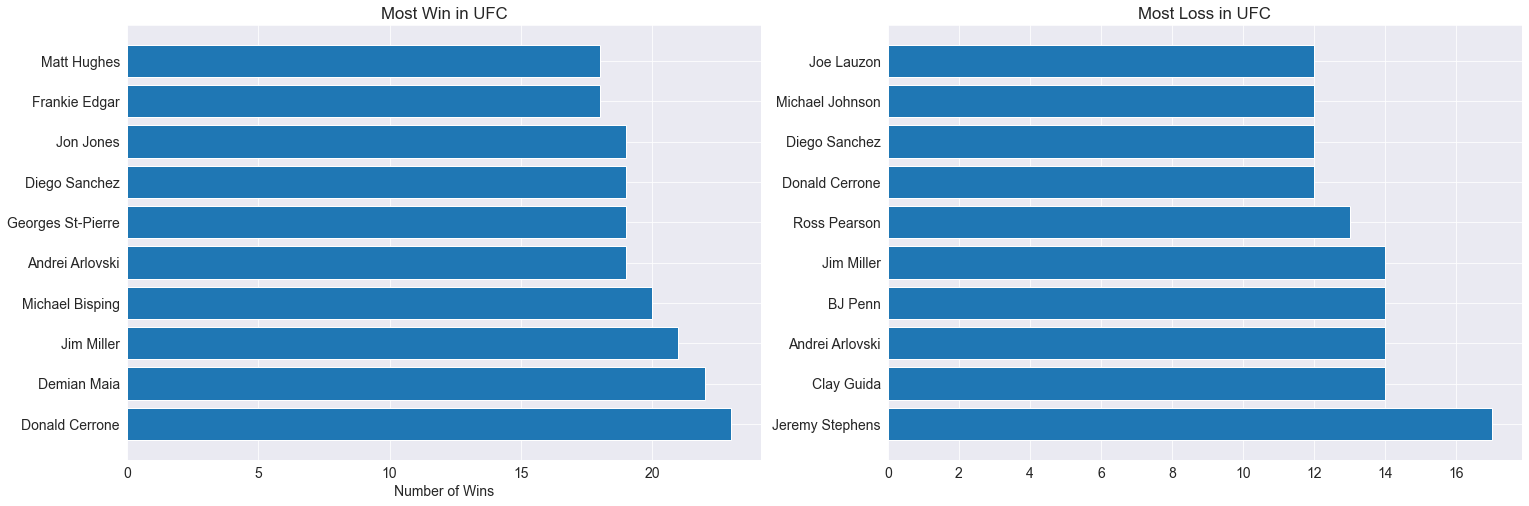

In [10]:
# Create dataframe of number of wins and losses of UFC fighters
fighter_win_loss = pd.DataFrame({
    "fighter": pd.concat([df['B_fighter'], df['R_fighter']]),
    "wins": pd.concat([df['B_wins'], df['R_wins']]),
    "losses": pd.concat([df['B_losses'], df['R_losses']])
})

# Get top 10 fighters with most wins
fighter_win = fighter_win_loss.sort_values(by=["wins"], ascending=False).drop_duplicates()
fighter_win.drop(['losses'], axis=1, inplace=True)
top_10_win = fighter_win.drop_duplicates(subset=["fighter"])[:10]

# Get top 10 fighters with most losses
fighter_loss = fighter_win_loss.sort_values(by=["losses"], ascending=False).drop_duplicates()
fighter_loss.drop(['wins'], axis=1, inplace=True)
top_10_loss = fighter_loss.drop_duplicates(subset=["fighter"])[:10]

# Create 2 plots
fig, axes = plt.subplots(1,2, figsize=(25,8))

# Plot most wins fighters
y_post_win = np.arange(len(top_10_win['fighter']))
axes[0].barh(y_post_win, top_10_win['wins'], align='center')
axes[0].set_yticks(y_post_win)
axes[0].set_yticklabels(top_10_win['fighter'])
axes[0].set_title("Most Win in UFC")
axes[0].set_xlabel("Number of Wins")

# Plot most losses fighters
y_post_loss = np.arange(len(top_10_loss['fighter']))
axes[1].barh(y_post_loss, top_10_loss['losses'], align='center')
axes[1].set_yticks(y_post_loss)
axes[1].set_yticklabels(top_10_loss['fighter'])
axes[1].set_title("Most Loss in UFC")



### Who has the longest win streak in UFC?

In [11]:
# concat red and blue fighter win streak
fighter_win_streak = {
    'fighters': pd.concat([df['R_fighter'], df['B_fighter']]),
    'win_streak': pd.concat([df['R_current_win_streak'], df['B_current_win_streak']])
}

# Turn dicts to data frame 
win_streak_df = pd.DataFrame(fighter_win_streak)

# get top 10 fighter with longest win steak
sorted_df = win_streak_df.sort_values(by=['win_streak'], ascending=False).drop_duplicates()[:50]
top_10_win_streak = sorted_df.drop_duplicates(subset=['fighters'])[0:10]
top_10_win_streak

,fighters,win_streak
2282,Anderson Silva,16
62,Kamaru Usman,12
204,Khabib Nurmagomedov,12
3879,Junior Dos Santos,9
2120,Chris Weidman,9
26,Israel Adesanya,9
4771,Jon Fitch,8
4543,Lyoto Machida,8
492,Yoel Romero,8
382,Alexander Volkanovski,8


Text(0.5, 0, 'Win Streak')

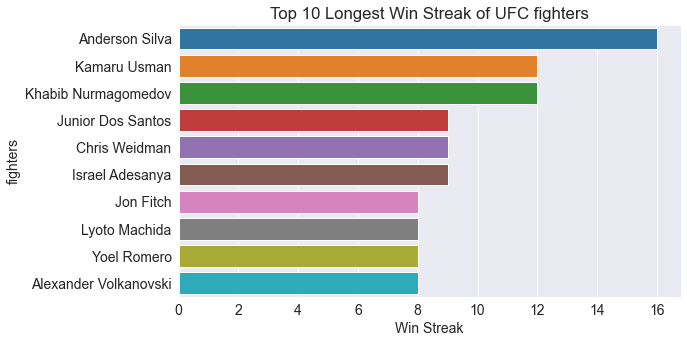

In [12]:
sns.barplot(y=top_10_win_streak['fighters'], x=top_10_win_streak['win_streak'])
plt.title("Top 10 Longest Win Streak of UFC fighters")
plt.xlabel("Win Streak")

### Which methods are most used to win the fight?

In [13]:
df.columns

Index(['Referee', 'date', 'location', 'Winner', 'title_bout', 'weight_class',
       'B_fighter', 'B_avg_KD', 'B_avg_SIG_STR_pct', 'B_avg_TD_pct',
       'B_avg_SIG_STR_landed', 'B_avg_TD_landed', 'B_avg_HEAD_landed',
       'B_avg_LEG_landed', 'B_avg_BODY_landed', 'B_total_title_bouts',
       'B_current_win_streak', 'B_avg_CTRL_time(seconds)', 'B_wins',
       'B_losses', 'B_win_by_Decision_Majority', 'B_win_by_Decision_Split',
       'B_win_by_Decision_Unanimous', 'B_win_by_KO/TKO', 'B_win_by_Submission',
       'B_win_by_TKO_Doctor_Stoppage', 'B_Stance', 'B_Height_cms',
       'B_Reach_cms', 'R_fighter', 'R_avg_KD', 'R_avg_SIG_STR_pct',
       'R_avg_TD_pct', 'R_avg_SIG_STR_landed', 'R_avg_TD_landed',
       'R_avg_HEAD_landed', 'R_avg_LEG_landed', 'R_avg_BODY_landed',
       'R_total_title_bouts', 'R_current_win_streak',
       'R_avg_CTRL_time(seconds)', 'R_wins', 'R_losses',
       'R_win_by_Decision_Majority', 'R_win_by_Decision_Split',
       'R_win_by_Decision_Unanimous', 'R_

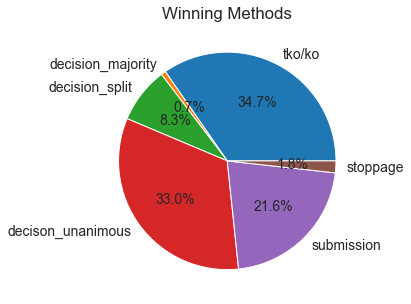

In [14]:
# Get total of each winning method
TKO_KO = df['B_win_by_KO/TKO'].sum() + df['R_win_by_KO/TKO'].sum()
decision_major = df['B_win_by_Decision_Majority'].sum() + df['R_win_by_Decision_Majority'].sum()
decision_split = df['B_win_by_Decision_Split'].sum() + df['R_win_by_Decision_Split'].sum()
decision_una = df['B_win_by_Decision_Unanimous'].sum() + df['R_win_by_Decision_Unanimous'].sum()
submission = df['B_win_by_Submission'].sum() + df['R_win_by_Submission'].sum()
stoppage = df['B_win_by_TKO_Doctor_Stoppage'].sum() + df['R_win_by_TKO_Doctor_Stoppage'].sum()

# Create a serie
winning_methods = pd.Series(data={
    "tko/ko": TKO_KO,
    "decision_majority": decision_major,
    "decision_split": decision_split,
    "decison_unanimous": decision_una,
    "submission": submission,
    "stoppage": stoppage
}, index = ["tko/ko", "decision_majority", "decision_split", "decison_unanimous", "submission", "stoppage" ])

# plot pie chart
label = winning_methods.index
value = winning_methods.to_list()
plt.title("Winning Methods")
plt.pie(value, labels=label, autopct="%1.1f%%");


### Which division/weight class occur most frequently ?

Text(0.5, 1.0, 'Number of Fights by Weight Class')

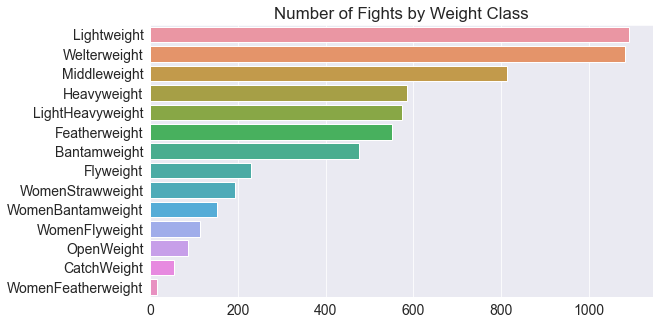

In [15]:
weight_class = df['weight_class'].value_counts()
sns.barplot(x=weight_class.to_list(), y=weight_class.index)
plt.title("Number of Fights by Weight Class")

### Which referee is most active?

Text(0.5, 1.0, 'Top 10 Active Referees')

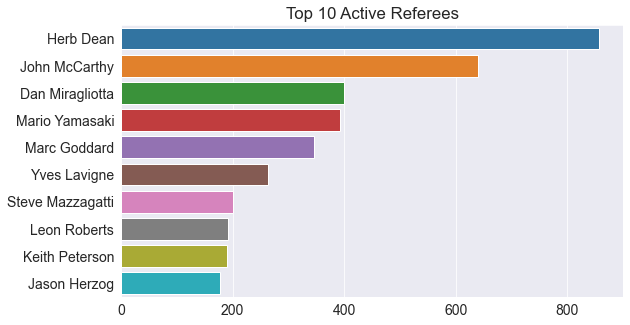

In [16]:
referee = df['Referee'].value_counts()[:10]
sns.barplot(x=referee.to_list(), y=referee.index)
plt.title("Top 10 Active Referees")

In [17]:
conor = df[(df['B_fighter'] == 'Conor McGregor') | (df['R_fighter'] == 'Conor McGregor')]
opponents = pd.concat([conor['B_fighter'], conor['R_fighter']])
opponents = opponents[opponents != 'Conor McGregor'].unique()
opponents

array(['Donald Cerrone', 'Nate Diaz', 'Dennis Siver', 'Diego Brandao',
       'Max Holloway', 'Dustin Poirier', 'Khabib Nurmagomedov',
       'Eddie Alvarez', 'Jose Aldo', 'Chad Mendes', 'Marcus Brimage'],
      dtype=object)

### Which damage landed used by fighters?

In [59]:
def plot_damage_landed(fighter_name):
    """Give fighter name, function plot a pie chart of damage landed by the fighter
       * The pie include significant strike landed, Take down landed, head landed,
       * leg landed, and body land
    """

    fighter_df = df[(df['B_fighter'] == fighter_name) | (df['R_fighter'] == fighter_name)]
    # fighter wins as a red & as a blue fighter
    red_win = fighter_df[(fighter_df['R_fighter'] == fighter_name) & (fighter_df['Winner'] == 'Red')]
    blue_win = fighter_df[(fighter_df['B_fighter'] == fighter_name) & (fighter_df['Winner'] == 'Blue')]

    # Create a new dataframe
    ## adding up damage landed
    damage_df = pd.DataFrame()
    damage_df['sig_str_landed'] = pd.concat([red_win['R_avg_SIG_STR_landed'], blue_win['B_avg_SIG_STR_landed']])
    damage_df['TD_landed'] = pd.concat([red_win['R_avg_TD_landed'], blue_win['B_avg_TD_landed']])
    damage_df['head_landed'] = pd.concat([red_win['R_avg_HEAD_landed'], blue_win['B_avg_HEAD_landed']])
    damage_df['leg_landed'] = pd.concat([red_win['R_avg_LEG_landed'], blue_win['B_avg_LEG_landed']])
    damage_df['body_landed'] = pd.concat([red_win['R_avg_BODY_landed'], blue_win['B_avg_BODY_landed']])

    # Reset index and drop NaN
    damage_df.reset_index(inplace=True)
    damage_df.drop(columns=['index'], axis=1, inplace=True)
    damage_df.drop(index=9, inplace=True)

    # sum numbers for each column
    total_landed = damage_df.sum(axis=0)
    label = total_landed.index
    value = []
    for num in total_landed.to_list():
        value.append(round(num, 2))

    # Create pie chartplt.title("Winning Methods")
    plt.pie(value, labels=label, autopct="%1.1f%%");
    plt.title(f"{fighter_name} Damage landed")


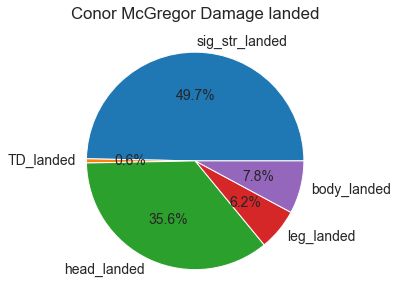

In [60]:
plot_damage_landed("Conor McGregor")

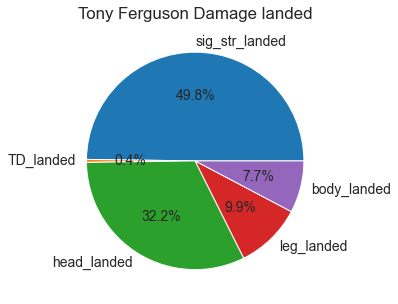

In [57]:
plot_damage_landed("Tony Ferguson")

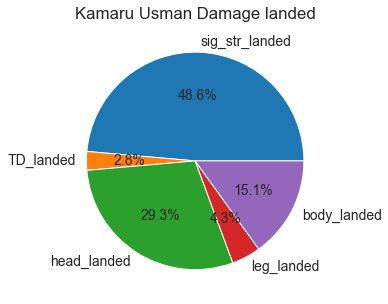

In [58]:
plot_damage_landed("Kamaru Usman")